In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1 = np.loadtxt("new20-330new.out")
data2 = np.loadtxt("new330-338new.out")
data3 = np.loadtxt("new338-500new.out")

In [3]:
d1 = data1[1560:]
dd = np.hstack((d1,data2))
ddd = np.hstack((dd,data3))

In [4]:
d4 = ddd.reshape(350,12)
dmean = np.nanmean(d4,axis=1)

In [5]:
dave = np.nanmean(dmean)
fin = dmean - dave

In [6]:
ww2 = np.convolve(fin, np.ones((5,))/5, mode='valid')

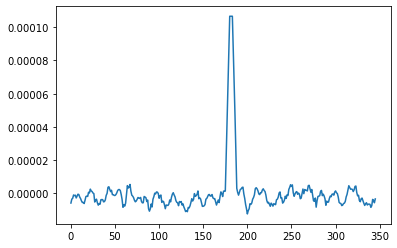

In [7]:
plt.plot(ww2)

In [8]:
wspxx = np.loadtxt("wspxx2.out")
mrpxx = np.loadtxt("mrpxx2.out")
#arpxx = np.loadtxt("arpxx2.out")
t = np.arange(2,348,1)

([<matplotlib.axis.XTick at 0x7f9a6454c7f0>,
 <a list of 18 Text xticklabel objects>)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


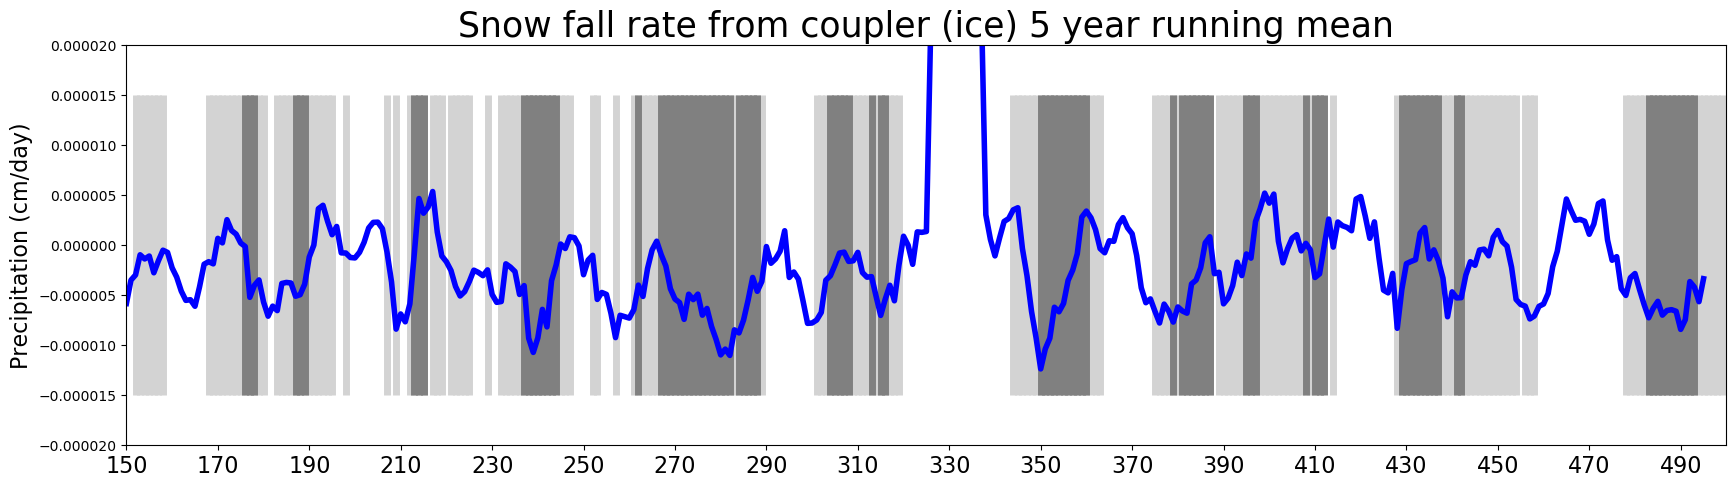

In [9]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
################################################################
t = np.arange(0,350,1)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.2],
                    xticklabels=[],ylim=(-0.000015, 0.000015))

ax1.plot(ww2,'blue',linewidth=4)

#ax1.fill_between(t,premean,pre,where=pre < premean,facecolor='purple', alpha=1)
#plt.hlines(premean*3600*24*100/997, 0, 350, colors = "blue",linestyles = "dashed")
#plt.vlines(arpxx, premean*3600*24*100/997, 0.000024*3600*24*100/997, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.000015, 0.000015, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.000015, 0.000015, colors = "grey",linewidth=5)
plt.ylabel('Precipitation (cm/day)',**my_font)
plt.axis("tight")

plt.title('Snow fall rate from coupler (ice) 5 year running mean', fontsize=25)
ax1.set(ylim=(-0.00002, 0.00002),xlim=(0, 350))
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)

In [10]:
data = ddd[:]

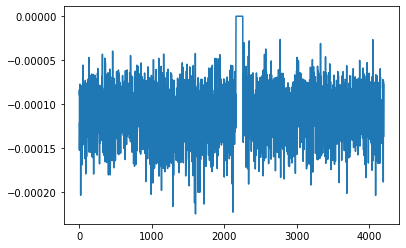

In [11]:
plt.plot(data)

In [12]:
data.shape

(4200,)

In [13]:
ww2 = np.convolve(data, np.ones((60,))/60, mode='valid')

In [14]:
mean = np.nanmean(ww2)
fin = ww2 -mean

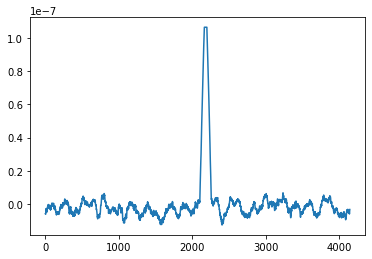

In [15]:
plt.plot(0.001*fin)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


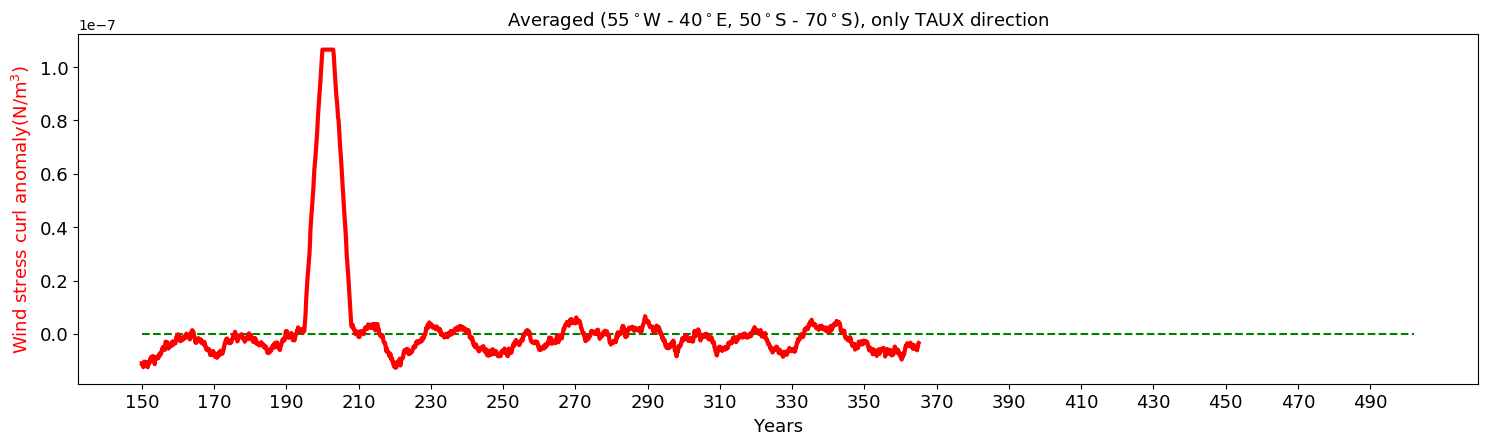

In [16]:
#t = np.arange(0,3720,12)
my_font = {'fontname':'Cambria', 'size':'13'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
ax0.plot(0.001*fin[1560:],'red',linewidth=3)
plt.hlines(0, 0, 4227, colors = "g",linestyles = "dashed")
#plt.xticks(range(0,5777,240), ['20', '40', '60', '80','100','120','140','160','180','200','220', '240', '260','280','300','320','340', '360', '380','400','420','440','460','480','500'],**my_font)
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'red',**my_font)
plt.axis("tight")
#ax0.set(ylim=(-0.000000011, 0.000000011),xlim=(0, 5777))
ax0.set_title('Averaged (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S), only TAUX direction',**my_font)
plt.savefig("windcurlice1.png",bbox_inches='tight',dpi=fig.dpi)

In [17]:
130*12

1560

In [18]:
#np.savetxt('TAUXcurl.out',fin)

In [19]:
np.savetxt('TAUXcurlyear.out',data)

In [20]:
b= np.load(file="curl.npy")

In [21]:
mid = np.zeros((120))
mid[mid == 0]=np.nan

In [22]:
dd = np.hstack((b,mid))
ddd = np.hstack((dd,-fin))

In [23]:
ddd.shape

(7922,)

Text(0, 0.5, 'Wind stress curl anomaly(N/m$^3$)')

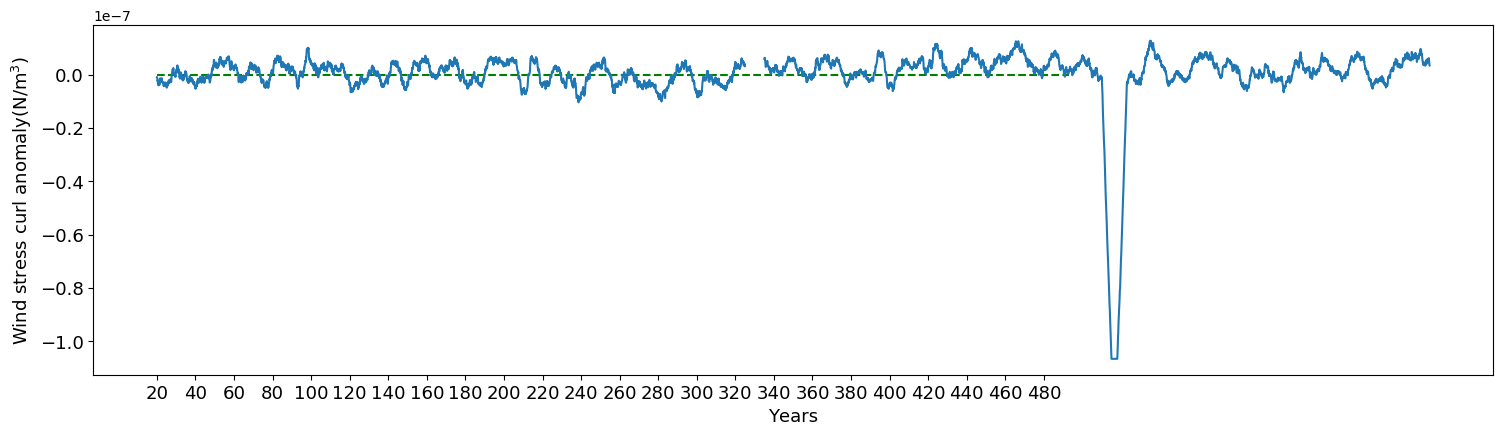

In [24]:
#t = np.arange(0,3720,12)
my_font = {'fontname':'Cambria', 'size':'13'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
ax0.plot(0.001*ddd)
plt.hlines(0, 0, 5677, colors = "g",linestyles = "dashed")
plt.xticks(range(0,5677,240), ['20', '40', '60', '80','100','120','140','160','180','200','220', '240', '260','280','300','320','340', '360', '380','400','420','440','460','480','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',**my_font)

In [25]:
mean

-0.0001065611319337268

In [26]:
310*12


3720

In [27]:
data11 = np.loadtxt("TAUY20-330.out")
data22 = np.loadtxt("TAUY330-340.out")
data33 = np.loadtxt("TAUY340-500.out")

In [28]:
#mid = np.zeros((120))
#mid[mid == 0]=np.nan
dd1 = np.hstack((data11,data22))
ddd1 = np.hstack((dd1,data33))

In [29]:
ww2 = np.convolve(ddd1, np.ones((60,))/60, mode='valid')

In [30]:
mean = np.nanmean(ww2)
fin = ww2 -mean

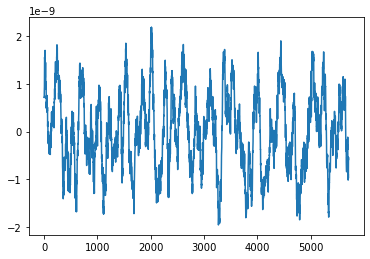

In [31]:
plt.plot(0.001*fin)

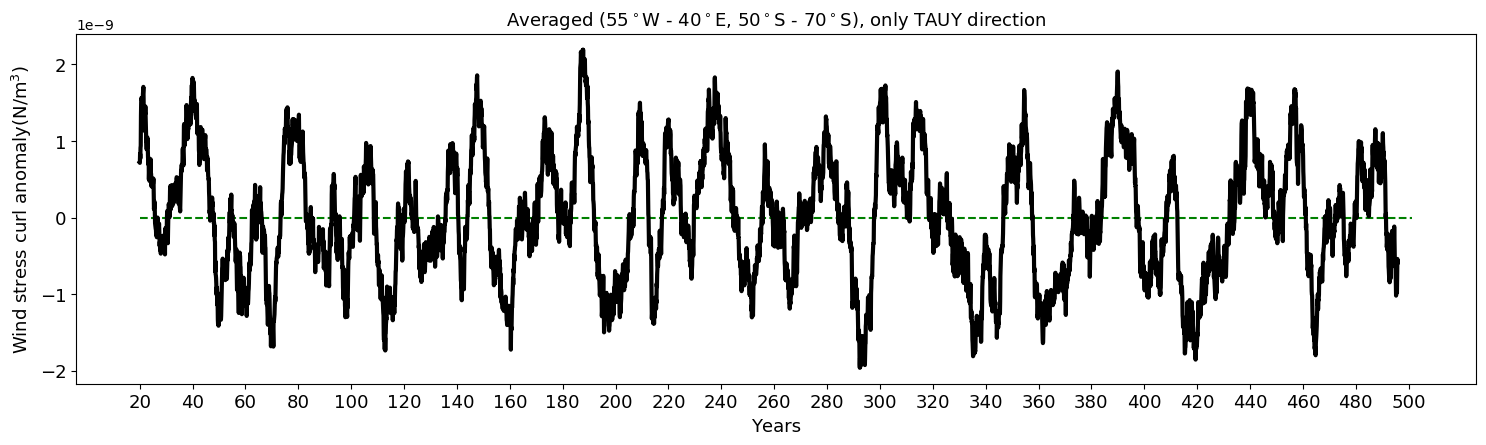

In [32]:
#t = np.arange(0,3720,12)
my_font = {'fontname':'Cambria', 'size':'13'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
ax0.plot(0.001*fin,'black',linewidth=3)
plt.hlines(0, 0, 5777, colors = "g",linestyles = "dashed")
plt.xticks(range(0,5777,240), ['20', '40', '60', '80','100','120','140','160','180','200','220', '240', '260','280','300','320','340', '360', '380','400','420','440','460','480','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'black',**my_font)
plt.axis("tight")
#ax0.set(ylim=(-0.000000011, 0.000000011),xlim=(0, 5777))
ax0.set_title('Averaged (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S), only TAUY direction',**my_font)
plt.savefig("windcurlTAUY.png",bbox_inches='tight',dpi=fig.dpi)

In [33]:
#np.savetxt('TAUYcurl.out',fin)

In [34]:
np.savetxt('TAUYcurlyear.out',ddd1)

In [35]:
ddd1.shape

(5770,)